In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('heart.csv')

In [2]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


This dataframe has 12 features, categorical and nurmerical.
'HeartDisease' will be the target on which I will be building the model.

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


From the dataframe descriction one can notice an intersting factor; the minimum value of Cholesterol and FastingBS are both zero.

In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The datagrame has no missing value.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

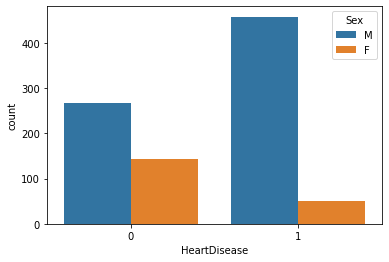

In [5]:
sb.countplot(data=data, x='HeartDisease', hue='Sex')

From the countplot graph, one can clearly see how males are particulalry affeccted by heart diseases.
This is not a generalization; there are 918 observations in this dataset and they come from different palces (USA, Hungary, Switzerland),
therefore, through this dataset, one can only find insights based on a relatively small amount of cases.

<AxesSubplot:xlabel='Age', ylabel='Density'>

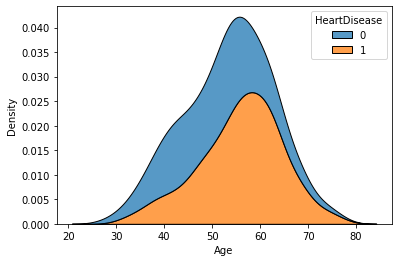

In [6]:
sb.kdeplot(data=data, x='Age', hue='HeartDisease', multiple="stack")

This graph shows who is affected by an heart disease, in relation with someone age.
Focusing on the orange curve, the density starts growing approximatley around 45, reaching his peak at 60 and decreasing constantly until it touches 70.

<AxesSubplot:xlabel='Age', ylabel='Density'>

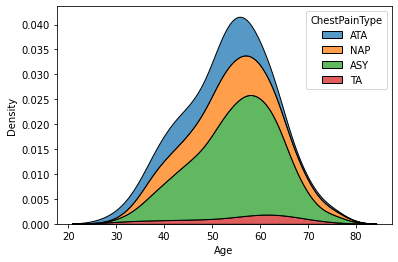

In [10]:
sb.kdeplot(data=data, x="Age", hue="ChestPainType",multiple="stack", legend=data.ChestPainType.unique)

Chest pain type:
- TA: Typical Angina, 
- ATA: Atypical Angina, 
- NAP: Non-Anginal Pain, 
- ASY: Asymptomatic.

Based on this graph, ATA is the one that occurs more often that the others.

<AxesSubplot:>

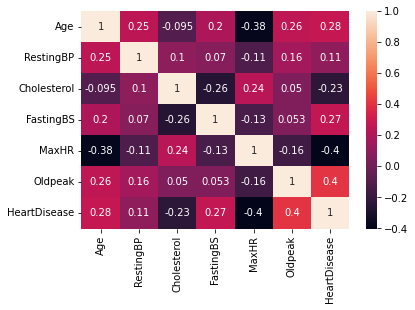

In [ ]:
sb.heatmap(data.corr(), annot=True)

From the heatmp one can see that there are not high related features, therefore I can only assume that all the features are important for the purpose of the model.

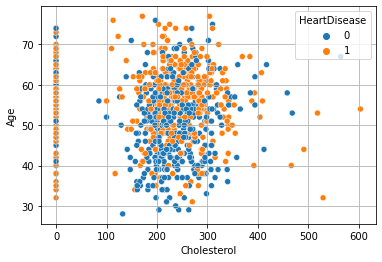

In [11]:
sb.scatterplot(data=data, x='Cholesterol', y='Age', hue='HeartDisease')
plt.grid()

<AxesSubplot:xlabel='MaxHR', ylabel='Age'>

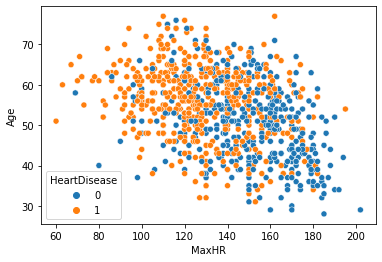

In [28]:
sb.scatterplot(data=data, x='MaxHR', y='Age', hue='HeartDisease')


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

In [15]:
new_categorical = {
                    'ChestPainType': {'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA' : 3},
                    'RestingECG': {'Normal': 0, 'ST': 1, 'LVH': 2},
                    'ExerciseAngina': {'N': 0, 'Y': 1},
                    'ST_Slope': {'Up': 0, 'Flat': 1, 'Down' : 2},
                    'Sex': {'M' :0,'F': 1}
                  }

data = data.replace(new_categorical)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [16]:
X = data.iloc[ : , 0:11].values
y = data.iloc[ : , 11].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [17]:

logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)

prediction = logistic_regression.predict(X_test)
print("Accuracy:", accuracy_score(y_test, prediction)) 

Accuracy: 0.8442028985507246


In [18]:
from sklearn.naive_bayes import GaussianNB

gm = GaussianNB()
gm.fit(X_train, y_train)

prediction_1 = gm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, prediction_1)) 

Accuracy: 0.8043478260869565


In [19]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "entropy",max_depth=3)
decision_tree.fit(X_train, y_train)

prediction_2 = decision_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, prediction_2))

Accuracy: 0.7971014492753623


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4, algorithm='auto', weights='distance')
knn_model = knn_model.fit(X_train, y_train)

prediction_3 = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, prediction_3))



Accuracy: 0.8369565217391305
